In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

In [3]:
def parse_cell(cell):
    """Converts '0. [0. - 0.]' into (0., 0., 0.)"""
    mean_str, rest = cell.split(' [')
    mean = float(mean_str)
    lower_str, upper_str = rest.replace(']', '').split(' - ')
    return mean, float(lower_str), float(upper_str)

In [11]:
# df = pd.read_csv(io.StringIO(csv_data))
df = pd.read_csv('../results.csv')

In [5]:
tasks = ['triage', 'monitoring']
fractions = [1, 10, 100]
methods = ['supervised', 'dynamics']

plot_data = {
    'triage': {'supervised': {'x': [], 'y': [], 'y_low': [], 'y_high': []}, 
               'dynamics':   {'x': [], 'y': [], 'y_low': [], 'y_high': []}},
    'monitoring': {'supervised': {'x': [], 'y': [], 'y_low': [], 'y_high': []}, 
                   'dynamics':   {'x': [], 'y': [], 'y_low': [], 'y_high': []}}
}

for method in methods:
    row = df[df['method'] == method].iloc[0]
    for task in tasks:
        for frac in fractions:
            col_name = f"{task} {frac}"
            val = row[col_name]
            mean, low, high = parse_cell(val)
            
            # Store
            plot_data[task][method]['x'].append(frac)
            plot_data[task][method]['y'].append(mean)
            plot_data[task][method]['y_low'].append(low)
            plot_data[task][method]['y_high'].append(high)

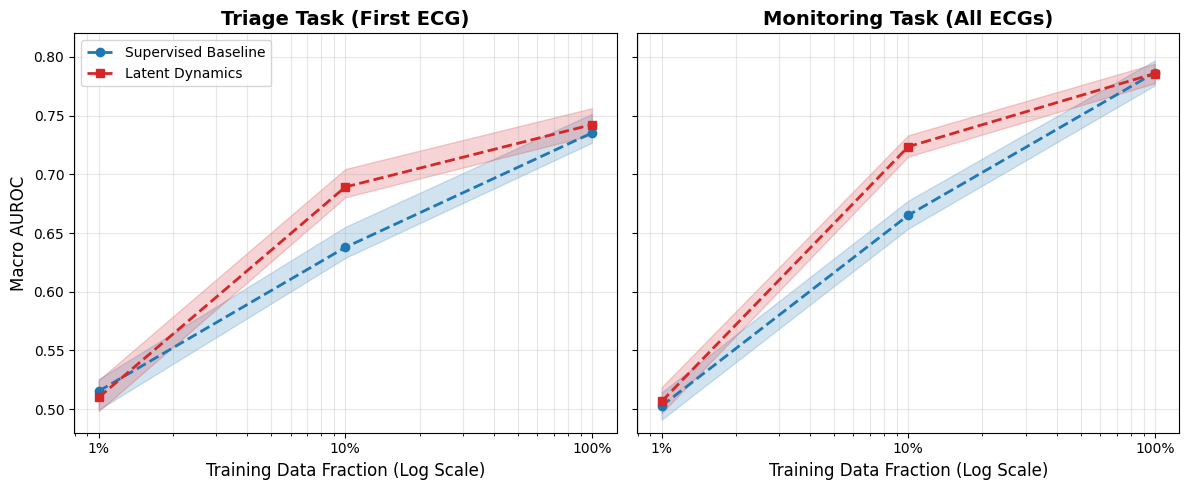

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Style settings
colors = {'supervised': '#1f77b4', 'dynamics': '#d62728'} # Blue vs Red
labels = {'supervised': 'Supervised Baseline', 'dynamics': 'Latent Dynamics'}
titles = {'triage': 'Triage Task (First ECG)', 'monitoring': 'Monitoring Task (All ECGs)'}
markers = {'supervised': 'o', 'dynamics': 's'}

for i, task in enumerate(tasks):
    ax = axes[i]
    
    for method in methods:
        data = plot_data[task][method]
        
        # Plot Mean Line
        ax.plot(data['x'], data['y'], 
                marker=markers[method], 
                color=colors[method], 
                label=labels[method], 
                linewidth=2, 
                markersize=6,
                linestyle='--')
        
        # Plot Confidence Interval
        ax.fill_between(data['x'], data['y_low'], data['y_high'], 
                        color=colors[method], 
                        alpha=0.2) # Shading

    # Formatting
    ax.set_title(titles[task], fontsize=14, weight='bold')
    ax.set_xscale('log')
    ax.set_xticks([1, 10, 100])
    ax.set_xticklabels(['1%', '10%', '100%'])
    ax.set_xlabel('Training Data Fraction (Log Scale)', fontsize=12)
    ax.grid(True, which="both", ls="-", alpha=0.3)
    
    # # Add gap notation for 10%
    # if task == 'triage':
    #     y_dyn = plot_data[task]['dynamics']['y'][1] # 10%
    #     y_sup = plot_data[task]['supervised']['y'][1] # 10%
    #     ax.annotate(f'+{y_dyn - y_sup:.2f}', xy=(10, (y_dyn+y_sup)/2), 
    #                 xytext=(13, (y_dyn+y_sup)/2),
    #                 arrowprops=dict(arrowstyle='-[, widthB=1.0', lw=1.5),
    #                 fontsize=10, weight='bold')

axes[0].set_ylabel('Macro AUROC', fontsize=12)
axes[0].set_ylim(0.48, 0.82)
axes[0].legend(fontsize=10, loc='upper left')

plt.tight_layout()
# plt.suptitle('Data Efficiency Scaling Laws: Latent Dynamics vs. Supervised', y=1.05, fontsize=16)
# plt.savefig('scaling_laws.png', dpi=300, bbox_inches='tight')
plt.show()